Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your collaborators below:

In [1]:
COLLABORATORS = ""

---

<div class="alert alert-danger">
As a reminder, one of the prerequisites for this course if programming experience, especially in Python. If you do not have experience in Python specifically, we <b>strongly</b> recommend you go through the <a href="http://www.codecademy.com/tracks/python">Codecademy Python course</a> as soon as possible to brush up on the basics of Python.
</div>

<div class="alert alert-warning">Before going through this notebook, you may want to take a quick look at [7 - Debugging.ipynb](7 - Debugging.ipynb) if you haven't already for some tips on debugging your code when you get stuck.</div>

In [2]:
import numpy as np

## Loading and saving data

Often when we are working with models, we will need to load data that does not currently exist within the Python environment. Additionally, as we create data within the Python environment, we may want to save it to disk, so that we can have access to it again later (i.e., if the IPython kernel is restarted).

One common use case for this is if we have a computationally intensive model that takes a long time to run. If we save out the data from the model after it finishes running, then we don't have to wait for it to run every time we want to use that data.

Another other common use case is when you have data from a different source -- for example, someone else's dataset, or perhaps human data you collected by hand. In these cases, we need to be able to load the existing data into our Python environment before we can do anything with it.

### Loading

Numpy arrays are typically stored with an extension of `.npy` or `.npz`. The `.npy` extension means that the file only contains a single numpy array, while the `.npz` extension indicates that there are multiple arrays saved in the file. To load either type of data, we use the `np.load` function, and provide a path to the data.

If you go back to the notebook list, you'll see a directory called `data`. This directory is on the file system of the server that hosts this notebook. If you click on the directory, you'll see three files, `experiment_data.npy`, `experiment_participants.npy`, and `panda.npy`. For now, we'll be paying attention to the first two files (the `panda.npy` file will be used later on in this problem):

![](images/data-folder.png)

(Note: it is possible that you will see more files that that, if you have already run through this notebook or other notebooks.)

Let's load the `experiment_data.npy` file. We're currently in the `Problem Set 0` directory, so we just need to specify the `data` directory beneath that:

In [3]:
x = np.load("data/experiment_data.npy")
x

array([[ 1668.07869346,   774.38921876,  3161.14983152, ...,
         2359.05394666,   784.36404676,   448.33416341],
       [ 2419.38185232,   809.18389145,  2766.62648929, ...,
         1159.47379735,  1330.44887992,  1842.3268586 ],
       [ 2221.02887591,  1496.00517071,   354.95889145, ...,
         1355.74575912,  1205.29137942,  1385.71283365],
       ..., 
       [ 1654.50469248,   518.3271927 ,  5127.58599224, ...,
         2544.1042064 ,   624.07607332,  1029.57386246],
       [  480.68016502,  4690.12200498,  1520.27397139, ...,
         1000.40541618,   988.73647145,   378.43452948],
       [ 1823.42891807,  3680.12951133,  3522.94413167, ...,
          591.4133153 ,   383.26367525,  1768.50528483]])

We can also load the participants:

In [4]:
p = np.load("data/experiment_participants.npy")
p

array(['p_045', 'p_039', 'p_027', 'p_023', 'p_041', 'p_008', 'p_025',
       'p_019', 'p_036', 'p_049', 'p_050', 'p_029', 'p_032', 'p_006',
       'p_028', 'p_034', 'p_044', 'p_016', 'p_010', 'p_017', 'p_022',
       'p_033', 'p_042', 'p_009', 'p_047', 'p_035', 'p_002', 'p_014',
       'p_020', 'p_043', 'p_003', 'p_012', 'p_030', 'p_015', 'p_011',
       'p_018', 'p_004', 'p_040', 'p_001', 'p_031', 'p_005', 'p_013',
       'p_046', 'p_038', 'p_021', 'p_026', 'p_024', 'p_048', 'p_007',
       'p_037'], 
      dtype='<U5')

### Saving

Let's say we wanted to save a copy of `data`. To do this, we use `np.save`, with the desired filename as the first argument and the numpy array as the second argument:

In [5]:
np.save("data/experiment_data_copy.npy", x)

After running the above cell, your `data/` directory should look like this:

![](images/data-folder2.png)

What if we wanted to save our data and our participants into the *same* file? We can do this with a different function, called `np.savez`. This takes as arguments the path to the data, followed by all the arrays we want to save. We use keyword arguments in order to specify the name of each array: `x` (the array holding our experiment data) will be saved under the key `data`, and `p` (the array of experiment participants) will be saved under the key `participants`:

In [6]:
np.savez(
    "data/experiment.npz",
    data=x,
    participants=p)

Note that we used the extension of `.npz` for this file, to indicate that it contains multiple arrays.

After saving this data, we should see the file in our `data/` directory:

![](images/data-folder3.png)

Now, if we were to load this data back in, we don't immediately get an array, but a special `NpzFile` object:

In [7]:
experiment = np.load("data/experiment.npz")
experiment

This special object acts like a dictionary. We can see what arrays are in this object using the `keys()` method:

In [8]:
experiment.keys()

['data', 'participants']

And we can extract each array by accessing it as we would if `experiment` were a dictionary:

In [9]:
experiment['data']

array([[ 1668.07869346,   774.38921876,  3161.14983152, ...,
         2359.05394666,   784.36404676,   448.33416341],
       [ 2419.38185232,   809.18389145,  2766.62648929, ...,
         1159.47379735,  1330.44887992,  1842.3268586 ],
       [ 2221.02887591,  1496.00517071,   354.95889145, ...,
         1355.74575912,  1205.29137942,  1385.71283365],
       ..., 
       [ 1654.50469248,   518.3271927 ,  5127.58599224, ...,
         2544.1042064 ,   624.07607332,  1029.57386246],
       [  480.68016502,  4690.12200498,  1520.27397139, ...,
         1000.40541618,   988.73647145,   378.43452948],
       [ 1823.42891807,  3680.12951133,  3522.94413167, ...,
          591.4133153 ,   383.26367525,  1768.50528483]])

In [10]:
experiment['participants']

array(['p_045', 'p_039', 'p_027', 'p_023', 'p_041', 'p_008', 'p_025',
       'p_019', 'p_036', 'p_049', 'p_050', 'p_029', 'p_032', 'p_006',
       'p_028', 'p_034', 'p_044', 'p_016', 'p_010', 'p_017', 'p_022',
       'p_033', 'p_042', 'p_009', 'p_047', 'p_035', 'p_002', 'p_014',
       'p_020', 'p_043', 'p_003', 'p_012', 'p_030', 'p_015', 'p_011',
       'p_018', 'p_004', 'p_040', 'p_001', 'p_031', 'p_005', 'p_013',
       'p_046', 'p_038', 'p_021', 'p_026', 'p_024', 'p_048', 'p_007',
       'p_037'], 
      dtype='<U5')

### Exercise: Saving files (0.5 points)

Write code to save a new `.npz` file which also contains the `data` and `participant` arrays (just like with `data/experiment.npz`). Your new file should additionally contain an array called "trials", which is a 1D array of integers from 1 to 300 (inclusive). You will need to create this array yourself. 

Save your file under the name `full_experiment.npz` into the `data/` directory.

In [11]:
# load the existing data
data = np.load("data/experiment_data.npy")
participants = np.load("data/experiment_participants.npy")

# YOUR CODE HERE
trials = np.arange(1,301)
np.savez("data/full_experiment.npz",
        data = data,
        participants = participants,
        trials = trials)

In [12]:
# add your own test cases in this cell!


In [13]:
from numpy.testing import assert_array_equal

# load the relevant data
data = np.load("data/experiment_data.npy")
participants = np.load("data/experiment_participants.npy")
experiment = np.load("data/full_experiment.npz")

# make sure the data matches
assert experiment['data'].shape == (50, 300)
assert experiment['participants'].shape == (50,)
assert experiment['trials'].shape == (300,)
assert_array_equal(experiment['data'], data)
assert_array_equal(experiment['participants'], participants)
assert_array_equal(experiment['trials'], np.arange(1, 301))

print("Success!")

Success!


## Vectorized operations on multidimensional arrays

Let's take a look at the data from the previous part of the problem a little more closely. This data is response times from a (hypothetical) psychology experiment, collected over 300 trials for 50 participants. Thus, if we look at the shape of the data, we see that the participants correspond to the *rows*, and the trials correspond to the *columns*:

In [14]:
experiment = np.load("data/full_experiment.npz")
data = experiment["data"]
data.shape

(50, 300)

In other words, element $(i, j)$ would be the $i^\mathrm{th}$ participant's response time on trial $j$, in milliseconds.

One question we might want to ask about this data is: are people getting faster at responding over time? It might be hard to tell from a single participant. For example, these are the response times of the first 10 trials from the first paraticipant:

In [15]:
data[0, :10]

array([ 1668.07869346,   774.38921876,  3161.14983152,  3937.23787728,
         611.38691655,   399.14776341,  1111.57048745,   470.29895368,
         612.20448123,   846.03869235])

And these are the response times on the last 10 trials from the first participant:

In [16]:
data[0, -10:]

array([ 1246.45495393,   502.16101614,   381.30327137,  3114.43071479,
         253.18200384,  3361.94176519,   985.87382528,  2359.05394666,
         784.36404676,   448.33416341])

At a glance, it looks like the last 10 trials might be slightly faster, but it is hard to know for sure because the data is fairly noisy. Another way to look at the data would be to see what the *average* response time is for each trial. This gives a measure of how quickly people can respond on each trial in a general sense.

To compute the average response time for a trial, we can use the `np.mean` function. Here is the first trial:

In [17]:
np.mean(data[:, 0])

1657.1310598599466

And the last trial:

In [18]:
np.mean(data[:, -1])

1246.7268640247446

On average, response times are faster on the last trial than on the first trial. How would we compute this for all trials? One answer would be to use a list comprehension, like this:

In [19]:
trial_means = [np.mean(data[:, i]) for i in range(300)]

However, the `np.mean` function can actually do this for us, without the need for a list comprehension. What we want to do is to take the *mean across participants*, or the *mean for each trial*. Participants correspond to the rows, or the *first dimension*, so we can tell numpy to take the mean across this first dimension with the `axis` flag (remember that 0-indexing is used in Python, so the *first* dimension corresponds to axis 0):

In [20]:
trial_means = np.mean(data, axis=0)

We can verify that we took the mean for each trial by checking the shape of `trial_means`:

In [21]:
trial_means.shape

(300,)

Checking the shape of your array after doing a computation over it is always a good idea, to verify that you did the computation over the correct axis. If we had accidentally used the wrong axis, our mistake would be readily apparent by checking the shape, because we know that if we want the mean for each trial, we should end up with an array of shape `(300,)`. However, if we use the wrong axis, this is not the case (we instead have the mean for every participant):

In [22]:
np.mean(data, axis=1).shape

(50,)

Note that if we didn't specify the axis, the mean would be taken over the *entire* array:

In [23]:
np.mean(data)

1766.3834293220148

So, be careful about keeping track of the shapes of your arrays, and think about when you want to use an axis argument or not!

## Plotting

Now that we've computed the average response time for each trial, it would be useful to actually visualize it, so we can see a graph instead of just numbers. To plot things, we need a special magic function that will cause the graphs to be displayed inline in the notebook:

In [24]:
%matplotlib inline

You only need to run this command once per notebook (though, note that if you restart the kernel, you'll need to run the command again). In most cases, we'll provide a cell with imports for you so you don't have to worry about remembering to include it. You additionally need to import the `pyplot` module from `matplotlib`:

In [25]:
import matplotlib.pyplot as plt

Let's load our data in again, and compute some descriptive statistics, just to make it clearer what it is that we are going to be plotting. Recall that the `trials` array is an array from 1 to 300 (inclusive), corresponding to the trial numbers. This array will serve as our $x$-values:

In [26]:
experiment = np.load("data/full_experiment.npz")
trials = experiment["trials"]
data = experiment["data"]

# compute mean and median response times for each trial
trial_mean = np.mean(data, axis=0)
trial_median = np.median(data, axis=0)

To plot things, we'll be using the `plt.subplots` function. Most of the time when we use it, we'll call it as `plt.subplots()`, which just produces a `figure` object (corresponding to the entire graph), and an `axis` object (corresponding to the set of axes we'll be plotting on):

Figure object: Figure(432x288)
Axis object: Axes(0.125,0.125;0.775x0.755)


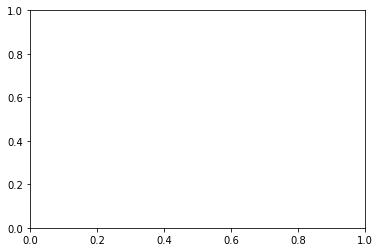

In [27]:
figure, axis = plt.subplots()
print("Figure object: " + str(figure))
print("Axis object: " + str(axis))

The distinction between the figure and the axis is clearer when we want multiple subplots, which we can also do with `plt.subplots`, by passing it two arguments: the number of rows of subplots that we want, and the number of columns of subplots that we want. Then, the function will return a single object for the entire figure, and a separate object for each subplot axis:

Figure object: Figure(432x288)
1st axis object: Axes(0.125,0.125;0.227941x0.755)
2nd axis object: Axes(0.398529,0.125;0.227941x0.755)
3rd axis object: Axes(0.672059,0.125;0.227941x0.755)


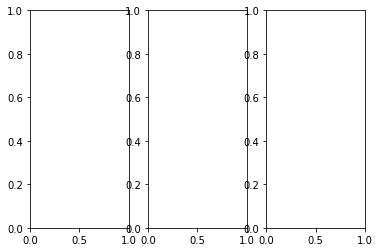

In [28]:
figure, (axis1, axis2, axis3) = plt.subplots(1, 3)
print("Figure object: " + str(figure))
print("1st axis object: " + str(axis1))
print("2nd axis object: " + str(axis2))
print("3rd axis object: " + str(axis3))

In general, the figure object is used for things like adjusting the overall size of the figure, while the axis objects are used for actually plotting data. So, once we have created our figure and axis (or axes), we plot our data on the specified axis using `axis.plot`. The third argument, `k`, is a shorthand for the color our data should be plotted in (in this case, black):

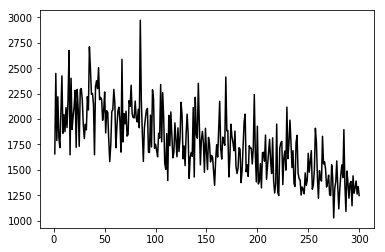

In [29]:
# create the figure
figure, axis = plt.subplots()
# plot the data
axis.plot(trials, trial_mean, 'k');

Displaying multiple lines on the same axis is as easy as calling the `axis.plot` method again with new data! Below, we plot the trial means and medians as separate lines on the same plot, with means in black (`'k'`) and medians in blue (`'b'`). We also introduce a new argument, `label`, which we use to specify the name for each line in the legend. To display the final legend, we call `plt.legend()` after we have added all the data we wish to plot to our specified axis.

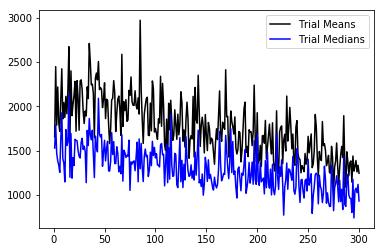

In [30]:
# create a new figure
figure, axis = plt.subplots()
# plot the mean and median as separate lines
axis.plot(trials, trial_mean, 'k', label='Trial Means');
axis.plot(trials, trial_median, 'b', label='Trial Medians');
# display the legend 
plt.legend();

A better visualization of this data would be points, rather than a line. To do this, we can change the `'k'` argument for trial means to `'ko'`, indicating that the data should again be plotted in black (`'k'`) and using a dot (`'o'`), and the `'b'` argument for trial medians to `'bs'` to plot them as blue (`'b'`) squares (`'s'`):

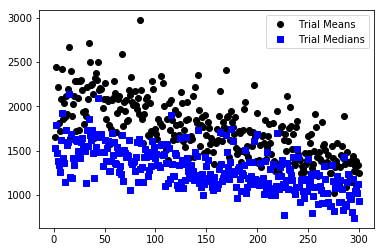

In [31]:
figure, axis = plt.subplots()
axis.plot(trials, trial_mean, 'ko', label='Trial Means');
axis.plot(trials, trial_median, 'bs', label='Trial Medians');
plt.legend();

We can also specify the color using a keyword argument and a RGB (red-green-blue) value. The following plots `trial_means` as green dots and `trial_medians` as red squares:

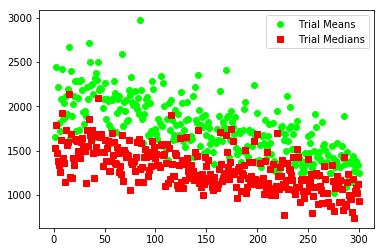

In [32]:
figure, axis = plt.subplots()
axis.plot(trials, trial_mean, 'o', color=(0, 1, 0), label='Trial Means');
axis.plot(trials, trial_median, 's', color=(1, 0, 0), label='Trial Medians');
plt.legend();

For a full list of all the different color and marker symbols (like `'ko'`), take a look at the documentation on `axis.plot`:

In [33]:
axis.plot?

Frequently, we will want to specify axis labels and a title for our plots, in order to be more descriptive about what is being visualized. To do this, we can use the `set_xlabel`, `set_ylabel`, and `set_title` commands:

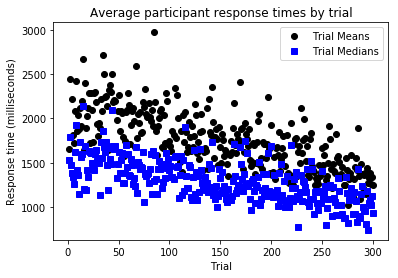

In [34]:
figure, axis = plt.subplots()
axis.plot(trials, trial_mean, 'ko', label='Trial Means');
axis.plot(trials, trial_median, 'bs', label='Trial Medians');

# set the label for the x (horizontal) axis
axis.set_xlabel("Trial")
# set the label for the y (vertical) axis
axis.set_ylabel("Response time (milliseconds)")
# set the title
axis.set_title("Average participant response times by trial");

# display legend
plt.legend();

Another plotting function that we will use is `matshow`, which displays a heatmap using the values of 2D array. For example, if we wanted to display an array of pixel intensities, we could use `matshow` to do so.

The file `data/panda.npy` contains an array of pixels that represent an image of a panda. As before, we can load in the data with `np.load`:

In [35]:
# load the pixel data as a numpy array
img = np.load("data/panda.npy")
# print the pixel intensity values
print('Raw pixel intensities:\n'+str(img))

Raw pixel intensities:
[[  92.           92.           94.         ...,   81.66666667
    72.66666667   71.        ]
 [  99.           93.           88.66666667 ...,   85.66666667
    79.66666667   77.        ]
 [ 104.66666667   93.66666667   81.66666667 ...,   84.33333333
    82.33333333   83.        ]
 ..., 
 [  49.66666667   47.66666667   60.         ...,    7.            6.            5.        ]
 [  51.           47.33333333   58.33333333 ...,    5.            5.            4.        ]
 [  62.           56.66666667   65.         ...,    3.            4.            4.        ]]


And now visualize the pixel intensity values using `matshow`:

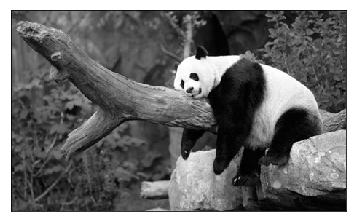

In [36]:
figure, axis = plt.subplots()

# show the array in grayscale
axis.matshow(img, cmap='gray')

# turn off the axis tickmarks
axis.set_xticks([])
axis.set_yticks([]);

It's important to specify that the colormap (or `cmap`) is `'gray'`, otherwise we end up with a crazy rainbow image!

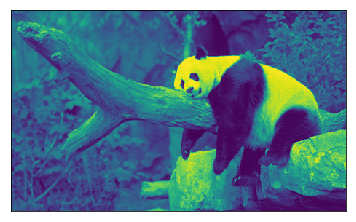

In [37]:
figure, axis = plt.subplots()

# show the array in grayscale
axis.matshow(img)

# turn off the axis tickmarks
axis.set_xticks([])
axis.set_yticks([]);

### Exercise: Squared exponential distance (4 points)

<div class="alert alert-success">
This next exercise is going to be broken into two steps: first, we will write a function to compute a distance between two numbers, and then we will plot the result.
</div>

We are going to compute a *squared exponential distance*, which is given by the following equation:

$$
D_{ij}=d(x_i, y_j)=e^\frac{-(x_i-y_j)^2}{2}
$$

where $x$ is a $n$-length vector and $y$ is a $m$-length vector. The variable $x_i$ corresponds to the $i^{th}$ element of $x$, and the variable $y_j$ corresponds to the $j^{th}$ element of $y$.

In [38]:
def squared_exponential(x, y):
    """Computes a matrix of squared exponential distances between
    the elements of x and y.

    Hint: your solution shouldn't require more than five lines
    of code, including the return statement.

    Parameters
    ----------
    x : numpy array with shape (n,)
    y : numpy array with shape (m,)

    Returns
    -------
    (n, m) array of distances

    """
    distance = np.zeros((x.size,y.size))  
    for i in x:
        for i2 in y:
            distance[int(i),int(i2)] = np.exp((-(i - i2)**2)/ 2)
    return distance

In [39]:
# add your own test cases in this cell!


In [40]:
from numpy.testing import assert_allclose
from nose.tools import assert_equal

d = squared_exponential(np.arange(3), np.arange(4))
assert_equal(d.shape, (3, 4))
assert_equal(d.dtype, float)
assert_allclose(d[0], [ 1.        ,  0.60653066,  0.13533528,  0.011108997])
assert_allclose(d[1], [ 0.60653066,  1.        ,  0.60653066,  0.13533528])
assert_allclose(d[2], [ 0.13533528,  0.60653066,  1.        ,  0.60653066])

d = squared_exponential(np.arange(4), np.arange(3))
assert_equal(d.shape, (4, 3))
assert_equal(d.dtype, float)
assert_allclose(d[:, 0], [ 1.        ,  0.60653066,  0.13533528,  0.011108997])
assert_allclose(d[:, 1], [ 0.60653066,  1.        ,  0.60653066,  0.13533528])
assert_allclose(d[:, 2], [ 0.13533528,  0.60653066,  1.        ,  0.60653066])

print("Success!")

Success!


<div class="alert alert-success">
Now, let's write a function to visualize these distances. Implement <code>plot_squared_exponential</code> to plot these distances using the <code>matshow</code> function.
</div>

<div class="alert alert-warning">Be sure to check the docstring of <code>plot_squared_exponential</code> for additional constraints -- going forward, in general we will give brief instructions in green cells like the one above, and more detailed instructions in the function comment.</div>

In [41]:
def plot_squared_exponential(axis, x, y):
    """Plot the squared exponential distance between the elements
    of x and y. Make sure to:

      * call the `squared_exponential` function to compute the distances 
        between `x` and `y`
      * use the grayscale colormap
      * remember to include axis labels and a title. 
      * turn off the tick marks on both axes

    Parameters
    ----------
    axis : matplotlib axis object
        The axis on which to plot the distances
    x : numpy array with shape (n,)
    y : numpy array with shape (m,)

    """
    s_e = squared_exponential(x,y)
    axis.matshow(s_e, cmap='gray')
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_xlabel("x axis")
    axis.set_ylabel("y axis")
    axis.set_title("Distances")

Now, let's see what our squared exponential function actually looks like. To do this we will look at 100 linearly spaced values from -2 to 2 on the x axis and 100 linearly spaced values from -2 to 2 on the y axis. To generate these values we will use the function `np.linspace`.

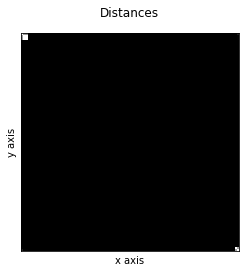

In [42]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

figure, axis = plt.subplots()
plot_squared_exponential(axis, x, y)

In [43]:
# add your own test cases in this cell!

In [44]:
from plotchecker import assert_image_allclose, get_image_colormap
from numpy.testing import assert_array_equal

# generate some random data
x = np.random.rand(100)
y = np.random.rand(75)

# plot it
figure, axis = plt.subplots()
plot_squared_exponential(axis, x, y)

# check image data
assert_image_allclose(axis, squared_exponential(x, y))

# check that the 'gray' colormap was used
assert_equal(get_image_colormap(axis), 'gray')

# check axis labels and title
assert axis.get_xlabel() != ''
assert axis.get_ylabel() != ''
assert axis.get_title() != ''

# check that ticks are removed
assert_array_equal(axis.get_xticks(), [])
assert_array_equal(axis.get_yticks(), [])

# close the plot
plt.close(figure)

print("Success!")

Success!


---

Before turning this problem in remember to do the following steps:

1. **Restart the kernel** (Kernel$\rightarrow$Restart)
2. **Run all cells** (Cell$\rightarrow$Run All)
3. **Save** (File$\rightarrow$Save and Checkpoint)

<div class="alert alert-danger">After you have completed these three steps, ensure that the following cell has printed "No errors". If it has <b>not</b> printed "No errors", then your code has a bug in it and has thrown an error! Make sure you fix this error before turning in your problem set.</div>

In [45]:
print("No errors!")

No errors!
